# Data Driven Prediction of a discharge capacity of a Li-ion Battery



In this task, data of a Li-ion Battery during its charging cycles and discharging cycles are given. From these data, a prediction of a discharge capacity of the Li-ion Battery for its future cycles is needed to be made.


The task is carried out in following steps.


## Steps

 1 Data loading and initial inspection
 
 2 Data cleaning
 
 3 Data visiulizing
 
 4 Development of a machine learning model and analysis
 
 5 Conclusion
 
 

##  1 Data loading and initial inspection

In [1]:
# Requried libraries!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Data loading
RawData = pd.read_csv('2018-04-12_batch8_CH33.csv')

#To see the raw data
RawData.head()

,Data_Point,Test_Time,DateTime,Step_Time,Step_Index,Cycle_Index,Current,Voltage,Charge_Capacity,Discharge_Capacity,Charge_Energy,Discharge_Energy,dV/dt,Internal_Resistance,Temperature,Aux_Voltage
0,0,60.0002,1.523583e+09,60.0002,0,0,0.0,3.298958,0.0,0.0,0.0,0.0,0.000031,NaN,NaN,NaN
1,1,120.0110,1.523583e+09,120.0110,0,0,0.0,3.298994,0.0,0.0,0.0,0.0,-0.000011,NaN,21.950123,NaN
2,2,180.0036,1.523583e+09,180.0036,0,0,0.0,3.299010,0.0,0.0,0.0,0.0,0.000024,NaN,21.996164,NaN
3,3,240.0044,1.523583e+09,240.0044,0,0,0.0,3.299028,0.0,0.0,0.0,0.0,-0.000014,NaN,22.138861,NaN
4,4,300.0033,1.523583e+09,300.0033,0,0,0.0,3.299037,0.0,0.0,0.0,0.0,-0.000011,NaN,22.339970,NaN


By looking  at the raw data, we see that we have different data which are labled with different columns. For our prediction task we do not need all of the data. Cleaning of the data is necessary.

## 2 Data cleaning

Our main objective is to predict the discharge capacity of the Li-ion battery for its future cycle life. For that, we would only focus on the data of Cycle no., Current, Voltage, Capacity, Resistance and Temperature during the discharge of the battery. 

In [11]:
# To extract only Cycle no. (Cycle_Index), Current, Voltage, Charge Capacity, Discharge Capacity, Resistance and Temperature during charging and discharging 
Data = RawData[['Cycle_Index', 'Current', 'Voltage', 'Charge_Capacity', 'Discharge_Capacity', 'Internal_Resistance', 'Temperature']]

# Fillter out data during its charging cycles.
# 'Current < 0' because during discharge cycles the current is negative.
# 'Cycle_Index > 0' because the data at the cycle zero are the intial recording of the data and they are not stable. That is why we need to filter out them as well.
DischargeData = Data[(Data['Cycle_Index']>0) & (Data['Current']<0)] 
DischargeData


,Cycle_Index,Current,Voltage,Charge_Capacity,Discharge_Capacity,Internal_Resistance,Temperature
3223,1,-0.528061,3.586256,1.064811,0.000010,0.015358,31.718330
3224,1,-1.012380,3.576085,1.064811,0.000010,0.015358,31.716774
3225,1,-1.496044,3.565458,1.064811,0.000010,0.015358,31.716607
3226,1,-1.980611,3.554204,1.064811,0.000081,0.015358,31.716444
3227,1,-2.464753,3.542597,1.064811,0.000081,0.015358,31.716278
...,...,...,...,...,...,...,...
1563865,2189,-0.069860,2.000017,0.937412,0.936827,0.015127,37.541813
1563866,2189,-0.065141,1.999958,0.937412,0.936885,0.015127,37.408211
1563867,2189,-0.060900,1.999912,0.937412,0.936940,0.015127,37.328854
1563868,2189,-0.056489,2.000008,0.937412,0.936992,0.015127,37.235325


As it can be seen from the discharge data (DischargeData), the data are recorded during the whole period of a perticular discharge cycle. We need to extract the value of the final discharge capacity at the end of a perticular discharge cycle. We  also extract maximum and minimum values of Current, Voltage and Temperature as well as values of Resistance during a perticular dicharge cycle.  

In [45]:
# First to creat empty data frame to store our required data
RequriedData = pd.DataFrame(np.zeros((DischargeData['Cycle_Index'].max()-1, 9)), columns = ['Cycle no.', 'Max. Discharge Capacity', 'Max. Voltage', 'Mini. Voltage', 'Max. Current', 'Mini. Current', 'Max. Temperature', 'Mini. Temperature', 'Resistance'])


# The following loop picks up the data, which we need, and store them in the data frame 'RequriedData'
for i in range(1,DischargeData['Cycle_Index'].max()+1):
    df = DischargeData[(DischargeData['Cycle_Index'] == i)]
    RequriedData['Cycle no.'][i-1] = i
    RequriedData['Max. Discharge Capacity'][i-1] = df['Discharge_Capacity'].max()
    RequriedData['Max. Voltage'][i-1] = df['Voltage'].max()
    RequriedData['Mini. Voltage'][i-1] = df['Voltage'].min()
    RequriedData['Max. Current'][i-1] = df['Current'].min()*-1
    RequriedData['Mini. Current'][i-1] = df['Current'].max()*-1
    RequriedData['Max. Temperature'][i-1] = df['Temperature'].max()
    RequriedData['Mini. Temperature'][i-1] = df['Temperature'].min()
    RequriedData['Resistance'][i-1] = df['Internal_Resistance'].max()



RequriedData

,Cycle no.,Max. Discharge Capacity,Max. Voltage,Mini. Voltage,Max. Current,Mini. Current,Max. Temperature,Mini. Temperature,Resistance
0,1.0,1.065044,3.586256,1.999112,4.400518,0.054971,38.116768,31.701559,0.015358
1,2.0,1.066155,3.585570,1.999208,4.400532,0.000513,38.042511,31.716379,0.015351
2,3.0,1.066578,3.583569,1.998595,4.400589,0.000114,38.083785,31.701365,0.015335
3,4.0,1.066985,3.584694,1.999815,4.400484,0.054929,37.995837,31.639917,0.015311
4,5.0,1.067467,3.584701,1.999733,4.400543,0.054996,37.982201,31.647800,0.015305
...,...,...,...,...,...,...,...,...,...
2183,2184.0,0.938215,3.586810,1.999841,4.400598,0.055000,36.886932,32.582437,0.015276
2184,2185.0,0.937864,3.586658,1.999757,4.400659,0.055000,36.824677,31.702946,0.015133
2185,2186.0,0.937750,3.586752,1.999823,4.400582,0.054931,37.708408,31.567630,0.015162
2186,2187.0,0.937481,3.586843,1.999803,4.400595,0.054998,37.192665,32.652653,0.015279


## 3 Data visualization

In the following, the graph of cycle no. vs discharge capacity is ploted.

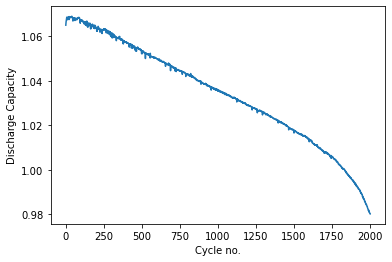

In [46]:
plt.plot(RequriedData['Cycle no.'][0:2000], RequriedData['Max. Discharge Capacity'][0:2000])
plt.xlabel('Cycle no.')
plt.ylabel('Discharge Capacity')
plt.show()

## 4 Development of a machine Learning Model and analysis

From the graph Cycle no. Vs Discharge Capacity, it can be seen that there is a linear relation between Cycle no. and discharge cappacity. As the cycle no. increases, the discharge capacity decreases.

As it is a simple linear relation, we can do the predictions of discharge capapcity in correspond to the cycle no. by using a machine learning model called linear regression with one variable.  

In [30]:
#We will train our model with 1000 data points which is nearly the half of the whole data set and we will check our model with the second half of the data set.

# Setting up the training data set.
TrainingData_X = RequriedData[['Cycle no.']][0:1000]
TrainingData_Y = RequriedData[['Max. Discharge Capacity']][0:1000]

#Linear Regression with one variable. 
# Our model will be Predicted_Capacity = a0 + a1*Cycle no.

X0 = pd.DataFrame(np.ones(1000)) #Required for calculating a0 and a1 parameters.
X= pd.concat([X0,TrainingData_X], axis=1,  ignore_index=True)
y = pd.concat([TrainingData_Y], axis=1,  ignore_index=True)



Initial_a0_a1 = [[1.065044],[-3.5]] #Initial values of a0 and a1.
a0_a1 =  pd.DataFrame(Initial_a0_a1)
alpha = 0.000001 # The learning rate.
iterations = 1000 # No. of iterations for finding the optimal values of a0 and a1. 
m = X.shape[0] # Required during calculation.



# A function to check the Error between the predicted value and the actual value.
def computeCost(X, y, a0_a1):
        m = y.shape[0]
        Error = 0
        Error = ((((X.dot(a0_a1))-y)**2).sum())/(2*m)
        return Error
    
# The following loop finds the optimal values of a0 and a1.
for i in range(iterations):
    
    T1 = a0_a1[0][0]-(alpha/m)*((((X.dot(a0_a1))-y)*X[[0]].values).sum())
    T2 = a0_a1[0][1]-(alpha/m)*((((X.dot(a0_a1))-y)*X[[1]].values).sum())
    a0_a1[0][0] = T1[0]
    a0_a1[0][1] = T2[0]


### Analysis

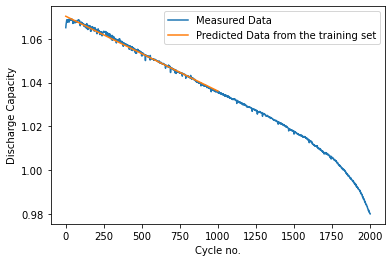

In [35]:
# The prediction of the discharge capacity from the training data set.
Predicted_from_TrainingData = X.dot(a0_a1)


#Data visualization of the actule discharge capacity and the predicted discharge capacity from the training data.
plt.plot(RequriedData['Cycle no.'][0:2000], RequriedData['Max. Discharge Capacity'][0:2000], label = 'Measured Data')
plt.plot(TrainingData_X['Cycle no.'][0:1000], Predicted_from_TrainingData[0], label = "Predicted Data from the training set")
plt.xlabel('Cycle no.')
plt.ylabel('Discharge Capacity')
plt.legend()
plt.show()

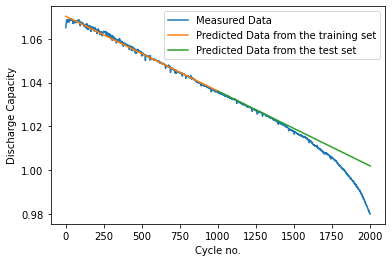

In [47]:
#the test set
T0 = pd.DataFrame(np.ones(1000))#Required for a0 and a1 parameters.
TestingData = RequriedData[['Cycle no.']][1000:2000]
TestingData.to_numpy()
T = pd.DataFrame(TestingData.to_numpy())
TestDataSet = pd.concat([T0,T], axis=1,  ignore_index=True)


# The prediction of the discharge capacity from the test data set
Predicted_for_TestData = TestDataSet.dot(a0_a1)


#Data visualization of the actule discharge capacity and the predicted discharge capacity from the training dataset and from the test dataset.
plt.plot(RequriedData['Cycle no.'][0:2000], RequriedData['Max. Discharge Capacity'][0:2000], label = 'Measured Data')
plt.plot(TrainingData_X['Cycle no.'][0:1000], Predicted_from_TrainingData[0], label = "Predicted Data from the training set")
plt.plot(RequriedData['Cycle no.'][1000:2000], Predicted_for_TestData[0], label = "Predicted Data from the test set")
plt.xlabel('Cycle no.')
plt.ylabel('Discharge Capacity')
plt.legend()
plt.show()


In [44]:
#The accuracy of the model will be considered by calculating the mean of sum of squared error (MSSE) between the predicted values and the actual values.
#The lower the mean of sum of squared error the higher is the accuracy of the model.

MSSE = computeCost(X, y, a0_a1)
MSSE

0    2.583802e-07
dtype: float64

## 5 Conclusion

As it can be seen from the figures and the value of MSSE, the given model gives the prediction of a discharge capacitiy in correspond to a cycle no. with an acceptable amount of accuracy. It is also noticable that the sudden drop in the discharge capacitiy after cycle no. 1600 were not predicted by  the model. This sudden drop of the capacity can be due to many factors and in our model we have consider only one variable which is the number of discharge cycles.

In order to improve the accuracy, one can think of a model in which more variables can be considered in order to predict the discharge capacity. An example of this kind of model is as follows:

Predicted_Discharge_Capacity = a0 + (a1 x Cycle no.) + (a2 x Max.Voltage) + (a3 x Mini.Voltage) + (a4 x Max.Current) + (a5 x Mini.Current) + (a6 x Max.Temperature) + (a7 x Mini.Temperature) + (a8 x Resistance)

One can also use the above mentioned variables and build an artificial neural network (ANN) or deep neural networks (DNNs) in order to perform the task of the prediction of the discharge capacity.

One should keep in mind that these complex models need time to be developed, to be trained, to be tested as well as they required a large amount of data and a fast computer system.

Within a given time and data and an available computer system, the machine learning model presented here was the optimal option which gives resutls not only at a good accuracy level but also fast.  